In [1]:
import json
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

from Utilities import score
from Utilities import plot_matrix_runs, plot_matrix_runs_different_scale, plot_results
from Utilities import Add_ID_Count_Neighbours, PairData

from training import training_loop

## Exploration of extracted homomorphism counts for MUTAG

In [4]:
with open('data/homomorphism_counts/MUTAG_50.homson') as f:
   data_run1 = json.load(f)

# To extract the homomorphism counts for each of the embeddings
hom_counts_list = np.array([element['counts'] for element in data_run1['data']], dtype = 'float')

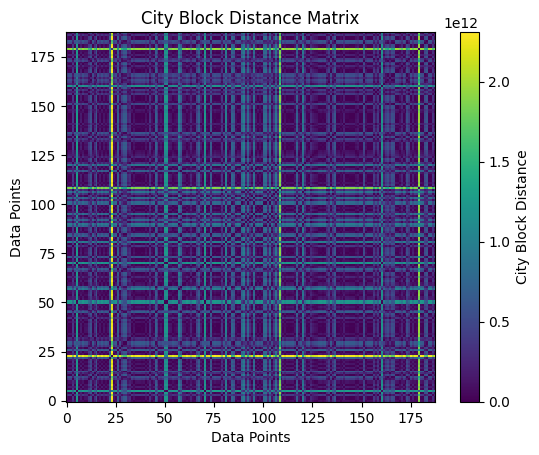

In [5]:
L1_dist = cdist(hom_counts_list, hom_counts_list, metric='cityblock')
plt.imshow(L1_dist, cmap='viridis', origin='lower', interpolation='none')
plt.colorbar(label='City Block Distance')
plt.title('City Block Distance Matrix')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()

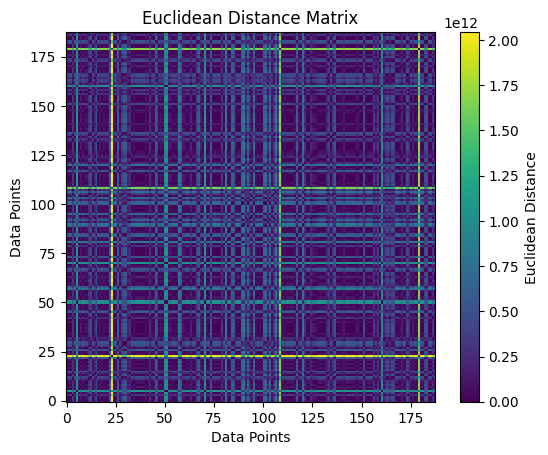

In [6]:
L2_dist = cdist(hom_counts_list, hom_counts_list, metric='euclidean')
plt.imshow(L2_dist, cmap='viridis', origin='lower', interpolation='none')
plt.colorbar(label='Euclidean Distance')
plt.title('Euclidean Distance Matrix')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()

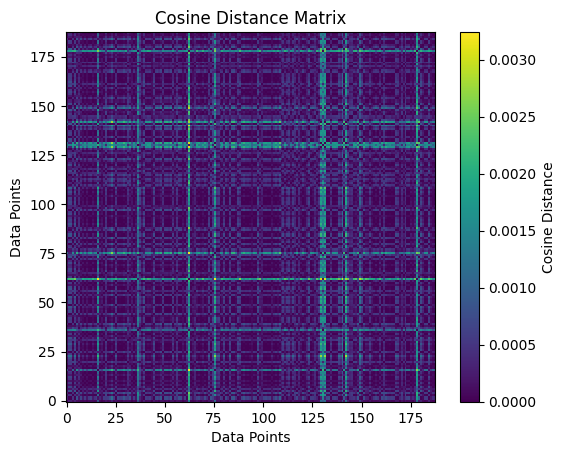

In [7]:
cosine_dist = cdist(hom_counts_list, hom_counts_list, metric='cosine')
plt.imshow(cosine_dist, cmap='viridis', origin='lower', interpolation='none')
plt.colorbar(label='Cosine Distance')
plt.title('Cosine Distance Matrix')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()

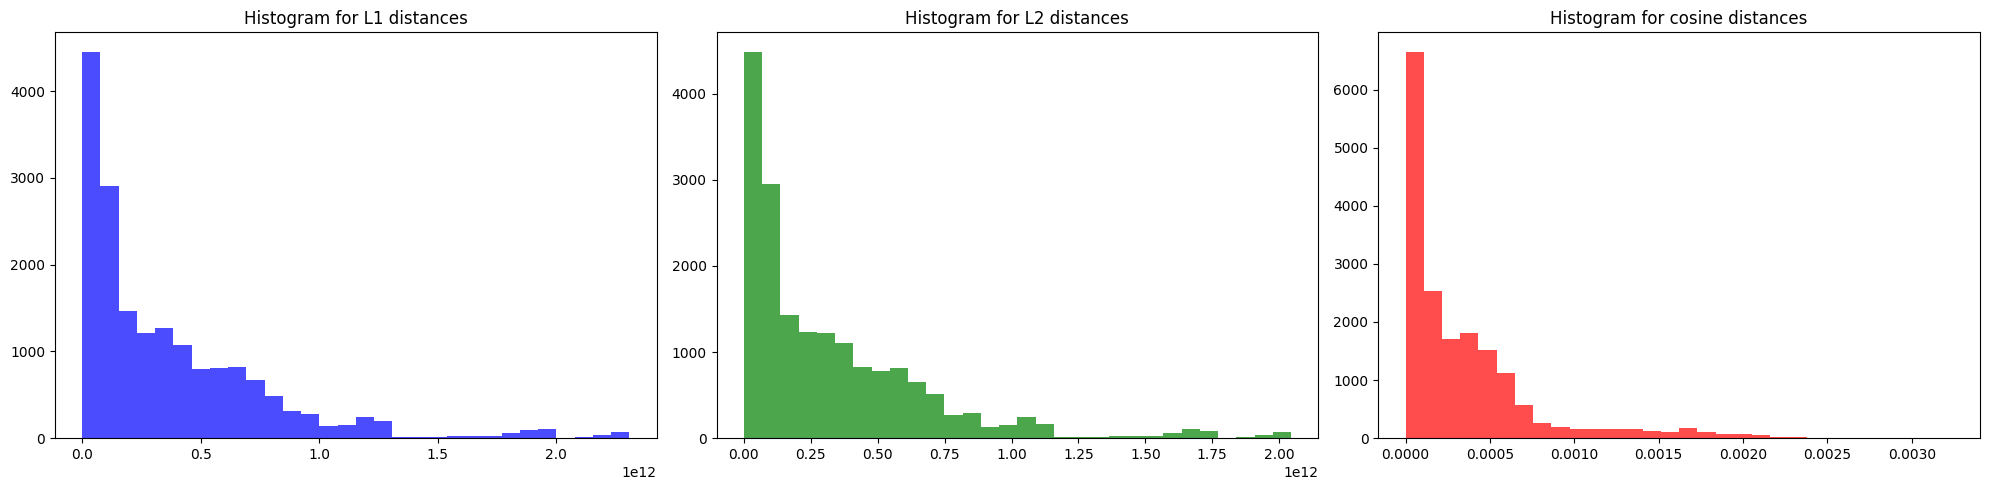

In [8]:
L1_distances = L1_dist[np.triu_indices(len(L1_dist))]
L2_distances = L2_dist[np.triu_indices(len(L2_dist))]
cosine_distances = cosine_dist[np.triu_indices(len(cosine_dist))]

# Create three separate subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot histogram for arr1
axs[0].hist(L1_distances, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Histogram for L1 distances')

# Plot histogram for arr2
axs[1].hist(L2_distances, bins=30, color='green', alpha=0.7)
axs[1].set_title('Histogram for L2 distances')

# Plot histogram for arr3
axs[2].hist(cosine_distances, bins=30, color='red', alpha=0.7)
axs[2].set_title('Histogram for cosine distances')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Count how many hom counts are identical
We have 37 hom counts patterns which have associated 0 homomorphism counts.

In [19]:
hom_counts_list
zero_columns_count = np.sum(np.all(hom_counts_list == 0, axis=0))
print("Number of columns where all entries are 0:", zero_columns_count) 

Number of columns where all entries are 0: 37
Number of columns where all entries are the same: 37
